Data loading



In [255]:
#importing necessary libraries
import numpy as np
import pandas as pd
import sqlite3


In [256]:
#loading orders.csv file
orders=pd.read_csv("orders.csv")
orders.head()

,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name
0,1,2508,450,18-02-2023,842.97,New Foods Chinese
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian


In [257]:
#loading users.json file
users=pd.read_json("users.json")
users.head()

,user_id,name,city,membership
0,1,User_1,Chennai,Regular
1,2,User_2,Pune,Gold
2,3,User_3,Bangalore,Gold
3,4,User_4,Bangalore,Regular
4,5,User_5,Pune,Gold


In [258]:
# loading restaurants.sql file
conn = sqlite3.connect("restaurants.db")

with open("restaurants.sql", "r") as f:
    sql_script = f.read()

conn.executescript(sql_script)

restaurants = pd.read_sql("SELECT * FROM restaurants", conn)
restaurants.head()

,restaurant_id,restaurant_name,cuisine,rating
0,1,Restaurant_1,Chinese,4.8
1,2,Restaurant_2,Indian,4.1
2,3,Restaurant_3,Mexican,4.3
3,4,Restaurant_4,Chinese,4.1
4,5,Restaurant_5,Chinese,4.8


Merging logic


In [259]:
#Perform joins using keys:
#orders.user_id → users.user_id
merged_1 = orders.merge(users,on="user_id",how="left")
#orders.restaurant_id → restaurants.restaurant_id
final_df = merged_1.merge(restaurants,on="restaurant_id",how="left")




Final dataset creation



In [260]:
# saving final merged dataset in final_food_delivery_dataset.csv
final_df.to_csv("final_food_delivery_dataset.csv", index=False)


In [261]:
df=pd.read_csv("final_food_delivery_dataset.csv")
df.head()

,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name_x,name,city,membership,restaurant_name_y,cuisine,rating
0,1,2508,450,18-02-2023,842.97,New Foods Chinese,User_2508,Hyderabad,Regular,Restaurant_450,Mexican,3.2
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine,User_2693,Pune,Regular,Restaurant_309,Indian,4.5
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi,User_2084,Chennai,Gold,Restaurant_107,Mexican,4.0
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg,User_319,Bangalore,Gold,Restaurant_224,Chinese,4.8
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian,User_1064,Pune,Regular,Restaurant_293,Italian,3.0


In [262]:
df['order_id'].nunique()

10000

Data cleaning



In [263]:
df.shape

(10000, 12)

In [264]:
df.size

120000

In [265]:
df.columns

Index(['order_id', 'user_id', 'restaurant_id', 'order_date', 'total_amount',
       'restaurant_name_x', 'name', 'city', 'membership', 'restaurant_name_y',
       'cuisine', 'rating'],
      dtype='object')

In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_id           10000 non-null  int64  
 1   user_id            10000 non-null  int64  
 2   restaurant_id      10000 non-null  int64  
 3   order_date         10000 non-null  object 
 4   total_amount       10000 non-null  float64
 5   restaurant_name_x  10000 non-null  object 
 6   name               10000 non-null  object 
 7   city               10000 non-null  object 
 8   membership         10000 non-null  object 
 9   restaurant_name_y  10000 non-null  object 
 10  cuisine            10000 non-null  object 
 11  rating             10000 non-null  float64
dtypes: float64(2), int64(3), object(7)
memory usage: 937.6+ KB


In [267]:
df.describe()

,order_id,user_id,restaurant_id,total_amount,rating
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1504.117700,251.016700,801.162412,4.045430
std,2886.89568,861.727776,144.622558,405.458753,0.606531
min,1.00000,1.000000,1.000000,100.200000,3.000000
25%,2500.75000,761.000000,127.000000,446.310000,3.500000
50%,5000.50000,1508.000000,251.000000,806.295000,4.100000
75%,7500.25000,2250.250000,376.000000,1149.227500,4.600000
max,10000.00000,3000.000000,500.000000,1499.830000,5.000000


In [268]:
df.dtypes

,0
order_id,int64
user_id,int64
restaurant_id,int64
order_date,object
total_amount,float64
restaurant_name_x,object
name,object
city,object
membership,object
restaurant_name_y,object


In [269]:
#fixing date datatype
df["order_date"] = pd.to_datetime(df["order_date"], dayfirst=True)
df.dtypes

,0
order_id,int64
user_id,int64
restaurant_id,int64
order_date,datetime64[ns]
total_amount,float64
restaurant_name_x,object
name,object
city,object
membership,object
restaurant_name_y,object


In [270]:
#checking if any nnull
df.isna().sum()

,0
order_id,0
user_id,0
restaurant_id,0
order_date,0
total_amount,0
restaurant_name_x,0
name,0
city,0
membership,0
restaurant_name_y,0


In [271]:
# check for any duplicates
df.duplicated().sum()

np.int64(0)

In [272]:
#Inconsistent Categories
df["membership"].unique()


array(['Regular', 'Gold'], dtype=object)

In [273]:
df["city"].unique()


array(['Hyderabad', 'Pune', 'Chennai', 'Bangalore'], dtype=object)

In [274]:
df["cuisine"].unique()

array(['Mexican', 'Indian', 'Chinese', 'Italian'], dtype=object)

Target value exploration

In [275]:
df["total_amount"].describe()


,total_amount
count,10000.000000
mean,801.162412
std,405.458753
min,100.200000
25%,446.310000
50%,806.295000
75%,1149.227500
max,1499.830000


In [276]:
df.groupby("membership")["total_amount"].mean()

,total_amount
membership,
Gold,797.145556
Regular,805.158434


In [277]:
df.groupby("city")["total_amount"].sum()

,total_amount
city,
Bangalore,2206946.58
Chennai,1990513.03
Hyderabad,1889366.58
Pune,1924797.93


Visualizations

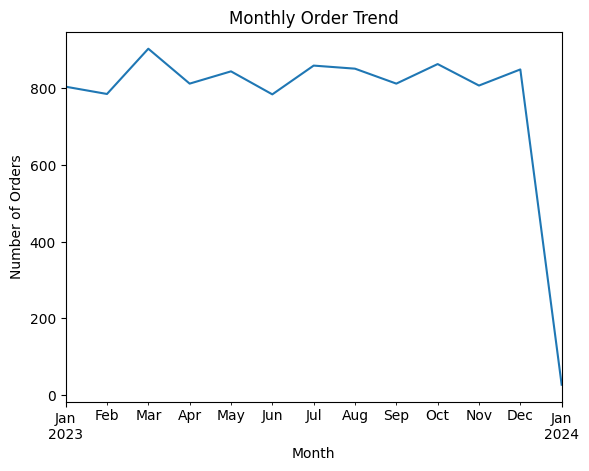

In [278]:
import matplotlib.pyplot as plt

#Orders per month
orders_per_month = df.groupby(df["order_date"].dt.to_period("M"))["order_id"].count()
orders_per_month.plot(kind="line")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.title("Monthly Order Trend")
plt.show()


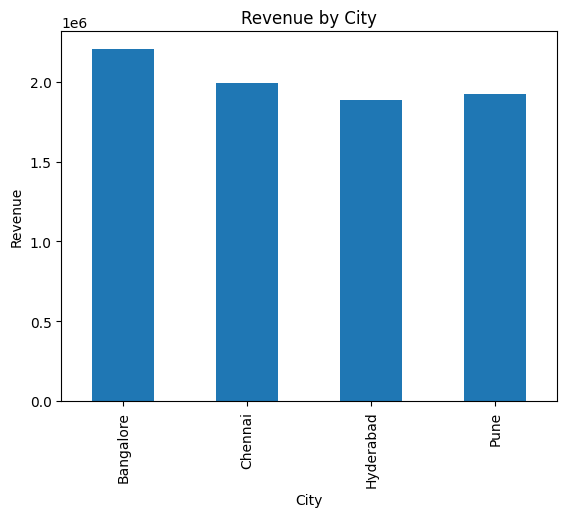

In [279]:
#Revenue by city
df.groupby("city")["total_amount"].sum().plot(kind="bar")
plt.xlabel("City")
plt.ylabel("Revenue")
plt.title("Revenue by City")
plt.show()


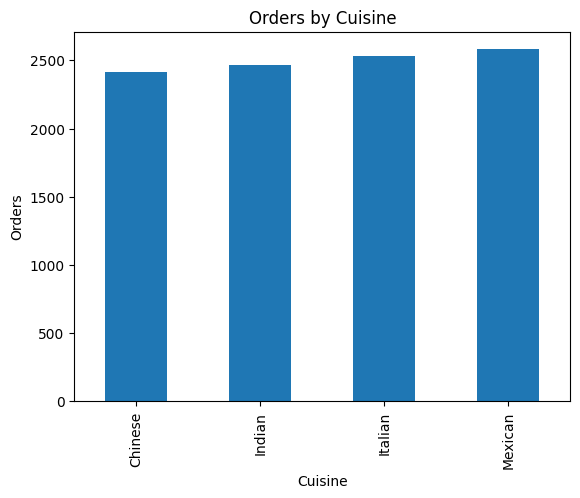

In [280]:
#Cuisine popularity
df.groupby("cuisine")["order_id"].count().plot(kind="bar")
plt.xlabel("Cuisine")
plt.ylabel("Orders")
plt.title("Orders by Cuisine")
plt.show()


# EDA Summary



*   The dataset was already very clean with no missing values
*   Revenue varied slightly across cities and cuisines

*   Strong repeat-user behavior was observed
*   Seasonal trends were visible in monthly order patterns
*   Membership type impacts order value and frequency









Analysis answers (linked to questions)

In [281]:
df.head()

,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name_x,name,city,membership,restaurant_name_y,cuisine,rating
0,1,2508,450,2023-02-18,842.97,New Foods Chinese,User_2508,Hyderabad,Regular,Restaurant_450,Mexican,3.2
1,2,2693,309,2023-01-18,546.68,Ruchi Curry House Multicuisine,User_2693,Pune,Regular,Restaurant_309,Indian,4.5
2,3,2084,107,2023-07-15,163.93,Spice Kitchen Punjabi,User_2084,Chennai,Gold,Restaurant_107,Mexican,4.0
3,4,319,224,2023-10-04,1155.97,Darbar Kitchen Non-Veg,User_319,Bangalore,Gold,Restaurant_224,Chinese,4.8
4,5,1064,293,2023-12-25,1321.91,Royal Eatery South Indian,User_1064,Pune,Regular,Restaurant_293,Italian,3.0


In [282]:
#Which city has the highest total revenue (total_amount) from Gold members?
gold_members = df[df["membership"] == "Gold"]
gold_members.head()
gold_members.groupby("city")["total_amount"].sum().max()

highest_total_revenue_gold=gold_members.groupby("city")["total_amount"].sum().idxmax()
highest_total_revenue_gold

'Chennai'

In [283]:
#Which cuisine has the highest average order value across all orders?
df.groupby("cuisine")["total_amount"].mean().max()
df.groupby("cuisine")["total_amount"].mean().idxmax()

'Mexican'

In [284]:
#How many distinct users placed orders worth more than ₹1000 in total (sum of all their orders)?
user_total_orders = df.groupby('user_id')['total_amount'].sum()
distinct_users_over_1000 = user_total_orders[user_total_orders > 1000].count()
distinct_users_over_1000

np.int64(2544)

In [285]:
#Which restaurant rating range generated the highest total revenue?
rating_bins = [3.0, 3.5, 4.0, 4.5, 5.0]
rating_labels = ['3.0-3.5', '3.6-4.0', '4.1-4.5', '4.6-5.0']
df['rating_range'] = pd.cut(df['rating'], bins=rating_bins, labels=rating_labels, include_lowest=True)

revenue_by_rating_range = df.groupby('rating_range')['total_amount'].sum()
highest_revenue_rating_range = revenue_by_rating_range.idxmax()
highest_revenue_rating_range

/tmp/ipython-input-823952491.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revenue_by_rating_range = df.groupby('rating_range')['total_amount'].sum()


'4.6-5.0'

In [286]:
#Among Gold members, which city has the highest average order value?
gold_members.groupby('city')['total_amount'].mean()
city_maxAvg_goldMembers=gold_members.groupby('city')['total_amount'].mean().idxmax()
city_maxAvg_goldMembers

'Chennai'

In [287]:
#Which cuisine has the lowest number of distinct restaurants but still contributes significant revenue?
df.groupby("cuisine").agg(restaurants=("restaurant_id", "nunique"),revenue=("total_amount", "sum")).sort_values("restaurants")


,restaurants,revenue
cuisine,,
Chinese,120,1930504.65
Indian,126,1971412.58
Italian,126,2024203.80
Mexican,128,2085503.09


In [288]:
#What percentage of total orders were placed by Gold members? (Rounded to nearest integer)
gold_orders=len(gold_members['total_amount'])
total_orders=len(df['total_amount'])
percentage_gold_orders=(gold_orders/total_orders)*100
percentage_gold_orders

49.87

In [289]:
#Which restaurant has the highest average order value but less than 20 total orders?
rest_stats = df.groupby("restaurant_name_x").agg(avg_value=("total_amount", "mean"),orders=("order_id", "count"))

highest_avg_value_restaurant = rest_stats[rest_stats["orders"] < 20].sort_values("avg_value", ascending=False).head()
highest_avg_value_restaurant

,avg_value,orders
restaurant_name_x,,
Hotel Dhaba Multicuisine,1040.222308,13
Sri Mess Punjabi,1029.180833,12
Ruchi Biryani Punjabi,1002.140625,16
Sri Delights Pure Veg,989.467222,18
Classic Kitchen Family Restaurant,973.167895,19


In [290]:
options = [
    "Grand Cafe Punjabi",
    "Grand Restaurant South Indian",
    "Ruchi Mess Multicuisine",
    "Ruchi Foods Chinese"
]

rest_stats.loc[rest_stats.index.intersection(options)]

,avg_value,orders
restaurant_name_x,,
Grand Cafe Punjabi,765.409063,32
Grand Restaurant South Indian,842.567586,29
Ruchi Foods Chinese,686.603158,19
Ruchi Mess Multicuisine,851.226250,40


In [291]:
#Which combination contributes the highest revenue?
df.groupby(["membership", "cuisine"])["total_amount"].sum().sort_values(ascending=False)


membership  cuisine
Regular     Mexican    1072943.30
            Italian    1018424.75
Gold        Mexican    1012559.79
            Italian    1005779.05
Regular     Indian      992100.27
Gold        Indian      979312.31
            Chinese     977713.74
Regular     Chinese     952790.91
Name: total_amount, dtype: float64

In [292]:
#During which quarter of the year is the total revenue highest?
df["quarter"] = df["order_date"].dt.to_period("Q")
df.head()
df.groupby("quarter")["total_amount"].sum().sort_values(ascending=False)


,total_amount
quarter,
2023Q3,2037385.10
2023Q4,2018263.66
2023Q1,1993425.14
2023Q2,1945348.72
2024Q1,17201.50


#Numerical questions


In [293]:
#How many total orders were placed by users with Gold membership?
gold_members=df[df["membership"]=="Gold"]
gold_orders=len(gold_members)
gold_orders

4987

In [294]:
#What is the total revenue (rounded to nearest integer) generated from orders placed in Hyderabad city?
round(df[df['city']=="Hyderabad"]['total_amount'].sum())


1889367

In [295]:
#How many distinct users placed at least one order?
df['user_id'].nunique()

2883

In [296]:
#What is the average order value (rounded to 2 decimals) for Gold members?
avg_gold_order_value=round(gold_members['total_amount'].mean(),2)
avg_gold_order_value

np.float64(797.15)

In [297]:
#How many orders were placed for restaurants with rating ≥ 4.5?
len(df[df['rating']>=4.5])

3374

In [298]:
#How many orders were placed in the top revenue city among Gold members only?
gold_city_rev=gold_members.groupby('city')['total_amount'].sum()
gold_city_rev
top_city = gold_city_rev.idxmax()
top_city
len(df[(df["membership"]=="Gold") & (df["city"]==top_city)])

1337

#Fill in the blanks


In [299]:
#The column used to join orders.csv and users.json is __________.

#merged_1 = orders.merge(users,on="user_id",how="left")

#user_id

In [300]:
#The dataset containing cuisine and rating information is stored in __________ format.

#SQL

In [309]:
#The total number of rows in the final merged dataset is __________.
df.shape
#10000

(10000, 14)

In [302]:
#If a user has no matching record in users.json, the merged values will be __________.

#NaN

In [303]:
#The Pandas function used to combine datasets based on a key is __________.

#merge()

In [313]:
#The column membership in the final dataset originates from the __________ file.

users['membership'].head()
#users.json

,membership
0,Regular
1,Gold
2,Gold
3,Regular
4,Gold


In [305]:
#The join key used to combine orders data with restaurant details is __________.

#final_df = merged_1.merge(restaurants,on="restaurant_id",how="left")

#restaurant_id

In [311]:
#The column that helps identify the type of food served by a restaurant is __________.
df['cuisine'].head()
#cuisine

,cuisine
0,Mexican
1,Indian
2,Mexican
3,Chinese
4,Italian


In [307]:
#If a user places multiple orders, their personal details appear __________ times in the final merged dataset.
#multiple

In [308]:
df.to_csv("final_food_delivery_dataset.csv", index=False)
